# **Prevendo uma faixa de renda dos Estudantes com ML**

# **Bibliotecas**

In [ ]:
#Bibliotecas 
import pandas as pd
import numpy as np #Matrizes e Arreys
import matplotlib.pyplot as plt #Analise visual
import seaborn as sns 

#Criacao de modelo ML em KNN
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

# **Análise simples no dataset**

In [ ]:
# Dataset baixado no site do Kapple
#Importando arquivo csv no caderno
df = pd.read_csv('drive/MyDrive/dados/Planilha.csv')
df.head(300)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
#Dropando colunas desnecessárias
df.drop(['sl_no'], 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
df.head(300)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
#Analisando Informações dentro do dataset
df.info(300)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [ ]:
#ssc_p = Nota do ensino fundamental
#ssc_b = Tipo de Escola (Pode ser Publica ou Particular)
#hsc_p = Nota do ensino medio
#hsc_b = Tipo de escola 
#hsc_s = Ensino tecnico e especialização
#degree_p = Faculdade na área de negocios (Notas)
#degree_t = Área que o estudante atuou
#workex = Se fez estágio ou não
#etest_p = Media da nota dentro da faculdade
#specialisation = Especialização na área de trabalho
#mba_p = Notas dentro do MBA
#status = Status de empregado (Empregado ou Não Empregado)
#salary = Salario (Salario zerado corresponde a não empregado)

# Modificando nome das colunas para facilitar a identificação

df.columns = ['Sexo', 'Nota_EF', 'Tipo_Escola', 'Nota_EM', 'Escola', 'Ensino_Tecnico',
              'Nota_Faculdade', 'Curso', 'Estagio', 'Nota_Faculdade_Media', 'Especialização',
              'Nota_MBA', 'Status', 'Salario']
df.head(300)

,Sexo,Nota_EF,Tipo_Escola,Nota_EM,Escola,Ensino_Tecnico,Nota_Faculdade,Curso,Estagio,Nota_Faculdade_Media,Especialização,Nota_MBA,Status,Salario
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
#Analisando a media (dados numericos)
df.describe()

,Nota_EF,Nota_EM,Nota_Faculdade,Nota_Faculdade_Media,Nota_MBA,Salario
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
#Analisando dados object
df.describe(include=['object'])

,Sexo,Tipo_Escola,Escola,Ensino_Tecnico,Curso,Estagio,Especialização,Status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


# **Tratando os Dados**

In [ ]:
#Filtrando e revendo dados especificos, no caso o Others da coluna Tipo_Escola
df = df[df['Tipo_Escola'] != 'Others']

In [ ]:
df.head(300)

,Sexo,Nota_EF,Tipo_Escola,Nota_EM,Escola,Ensino_Tecnico,Nota_Faculdade,Curso,Estagio,Nota_Faculdade_Media,Especialização,Nota_MBA,Status,Salario
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,M,41.00,Central,42.00,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
207,M,83.33,Central,78.00,Others,Commerce,61.00,Comm&Mgmt,Yes,88.56,Mkt&Fin,71.55,Placed,300000.0
208,F,43.00,Central,60.00,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN
209,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.00,Mkt&Fin,56.49,Placed,216000.0


In [ ]:
#Para facilitar a identificação de salários faltantes, será inserio o '0'
#Para isso a função .fillna() que irá restringir e substituir os valores NaN por '0'
df['Salario'].fillna(0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#Separando alunos que ganham acima da mediana e aqueles que ganham abaixo dela.
df['Salario'].describe()

count       116.000000
mean     193767.241379
std      162738.753449
min           0.000000
25%           0.000000
50%      240000.000000
75%      276000.000000
max      940000.000000
Name: Salario, dtype: float64

Mediana de 240.000 mil

In [ ]:
#Separando estudantes acima da mediana e abaixo
#Para fazer essa divisão será necessária a função .loc
df.loc[df['Salario'] < 240000, 'Salario'] = 0
df.loc[df['Salario'] >= 240000, 'Salario'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
#Usando o .unique() para ver a coluna 'Salario'
df['Salario'].unique()

array([0., 1.])

In [ ]:
# Para tratar dados categorigos, será necessário a utilização da função pd.get_dummies()
# Ele converte dados categóricos em variáveis ​​fictícias ou indicadoras. Parâmetros: dados: cujos dados devem ser manipulados.
df_D = pd.get_dummies(df)
df_D.head(300)

,Nota_EF,Nota_EM,Nota_Faculdade,Nota_Faculdade_Media,Nota_MBA,Salario,Sexo_F,Sexo_M,Tipo_Escola_Central,Escola_Central,...,Ensino_Tecnico_Science,Curso_Comm&Mgmt,Curso_Others,Curso_Sci&Tech,Estagio_No,Estagio_Yes,Especialização_Mkt&Fin,Especialização_Mkt&HR,Status_Not Placed,Status_Placed
1,79.33,78.33,77.48,86.50,66.28,0.0,0,1,1,0,...,1,0,0,1,0,1,1,0,0,1
2,65.00,68.00,64.00,75.00,57.80,1.0,0,1,1,1,...,0,1,0,0,1,0,1,0,0,1
3,56.00,52.00,52.00,66.00,59.43,0.0,0,1,1,1,...,1,0,0,1,1,0,0,1,1,0
4,85.80,73.60,73.30,96.80,55.50,1.0,0,1,1,1,...,0,1,0,0,1,0,1,0,0,1
7,82.00,64.00,66.00,67.00,62.14,1.0,0,1,1,1,...,1,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,41.00,42.00,60.00,97.00,53.39,0.0,0,1,1,1,...,1,1,0,0,1,0,1,0,1,0
207,83.33,78.00,61.00,88.56,71.55,1.0,0,1,1,0,...,0,1,0,0,0,1,1,0,0,1
208,43.00,60.00,65.00,92.66,62.92,0.0,1,0,1,0,...,1,1,0,0,1,0,0,1,1,0
209,62.00,72.00,65.00,67.00,56.49,0.0,0,1,1,1,...,0,1,0,0,1,0,1,0,0,1


#**Analisando o Grafico com a Matriz de Correlaçao**

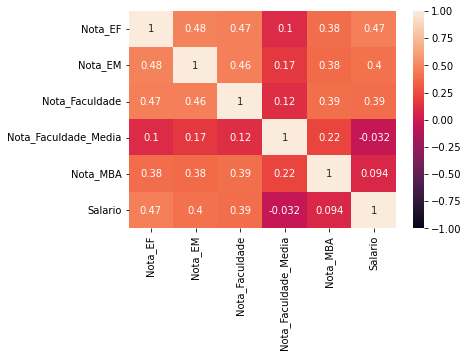

In [ ]:
 # Usando a biblioteca Seaborn
#sns.heatmap vai fazer uma representação grafica com cores
#plt.show() exibir grafico
sns.heatmap(df.corr(), annot=True, vmin= -1, vmax= 1)
plt.show()

As colunas Nota_EF e Nota_EM são as que tem a maior correlção com a coluna Salario

É importante notar que mesmo que alunos com notas altíssimas no ensino medio, não significa que ele terá um salário acima da mediana

# **Fazendo análise grafica**

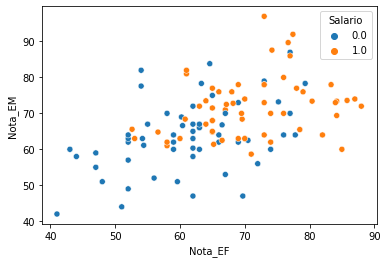

In [ ]:
# eixo x e o eixo y, serão as notas do Ensino Fundamental e Ensino Medio junto com a mediana do Salario para diferenciar os pontos
sns.scatterplot(data=df, x = 'Nota_EF', y = 'Nota_EM', hue= 'Salario')
plt.show()

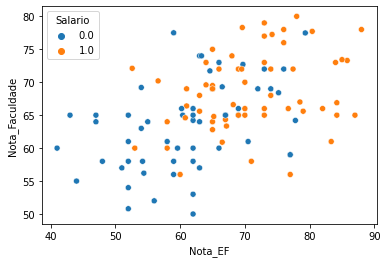

In [ ]:
# eixo x e o eixo y, serão as notas do Ensino Fundamental e Faculdade junto com a mediana do Salario para diferenciar os pontos
sns.scatterplot(data=df, x = 'Nota_EF', y = 'Nota_Faculdade', hue= 'Salario')
plt.show()

# **Hora de prever o alvo usando o KNN**

Nesse processo, será necessário separar alguns dados aspectos no dataset e depois prever o alvo que é o salário.

Sendo assim, agora é definir as colunas de caracteristicas e as que são para prever o resultado, usando o features(X) e targets(Y)

In [ ]:
# As features são basicamente todas as colunas, exceto Salario
X = np.array(df_D.drop(['Salario'], 1))

#coluna target é somente o Salario
Y = np.array(df_D['Salario'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Separando o dataset em Treino e Teste, utilizando a função model_selection.train_test_split()

In [ ]:
from pandas.core.common import random_state
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2, random_state=0)
#test_size = 0.2, representa 20% do teste e random_state = 0, faz novos testes no modelo

Normalizando os valores para aumentar a probabilidade, usando a função StandardScaler()

In [ ]:
#Padroniza as features removendo a média e escala a variância a uma unidade. Isso significa que para cada feature, a média seria 0, 
# e o Desvio Padrão seria 1. Desta forma, as features são padronizadas, tornando-as mais manejáveis para nossos modelos
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Agora é chamar a função neighbors.KNeighborsClassifier() que está atribuida a uma variável clf

In [ ]:
#19 é o numero de vizinhos, metric = 'euclidean' calcular metricas de distancias e similaridades
clf = neighbors.KNeighborsClassifier(n_neighbors= 19, metric='euclidean')

Para treinar ele, será necessário a função .fit(), que vai receber as features de treiro e tambem o target de treino

In [ ]:
#Receber as features e targets de treino
clf.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

Com o modelo treinado, agora é utilizar ele em teste com os dados (X_test e Y_test), usando a função clf.score(), onde irá receber dois parametros, as features e targets de teste

In [ ]:
# features de teste (X_test) e target de teste (Y_test)
accuracy = clf.score(X_test, Y_test)
accuracy

0.9166666666666666

Aproximadamento uma acerto de 92%